In [1]:
%matplotlib inline
import pandas as pd #dataframes
import numpy as np #numerical analysis
import seaborn as sns #plotting
import matplotlib.pyplot as plt #more plotting
# 1. Acquire data
df = pd.read_csv("https://raw.githubusercontent.com/ga-students/DAT-NYC-37/master/lessons/lesson-07/assets/dataset/bikeshare.csv")

"https://raw.githubusercontent.com/ga-students/DAT-NYC-37/master/lessons/lesson-07/assets/dataset/bikeshare.csv"

### Additional Resources
# 2. Preview Data
df.head()

# Check:
# 1. Missing values
# 2. Proper formatting/encoding (dates, numbers, etc are as they should be)
# 3. Sanity: Do the values makes sense
# 4. Extra/redundant columns: dteday, cnt, instant
# 5. Correlation

# Remove: registered, dteday, instant
# ---
# Specify target: casual

features = df.drop(["cnt", "registered", "dteday", "instant", "casual"], axis=1)

target = df["casual"]

In [2]:
print len(df)
df.describe()

17379


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.dtypes

In [9]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
(df["casual"] + df["registered"] == df["cnt"]).all()

True

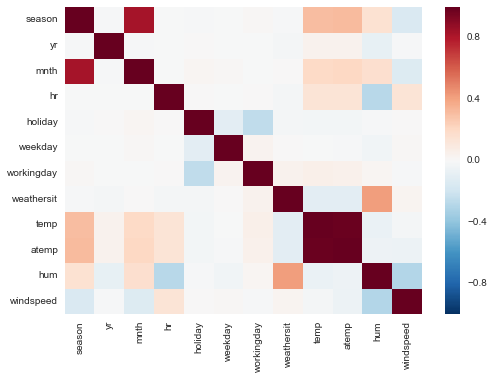

In [5]:
sns.heatmap(features.corr());
# TODO: Remove temp or atemp



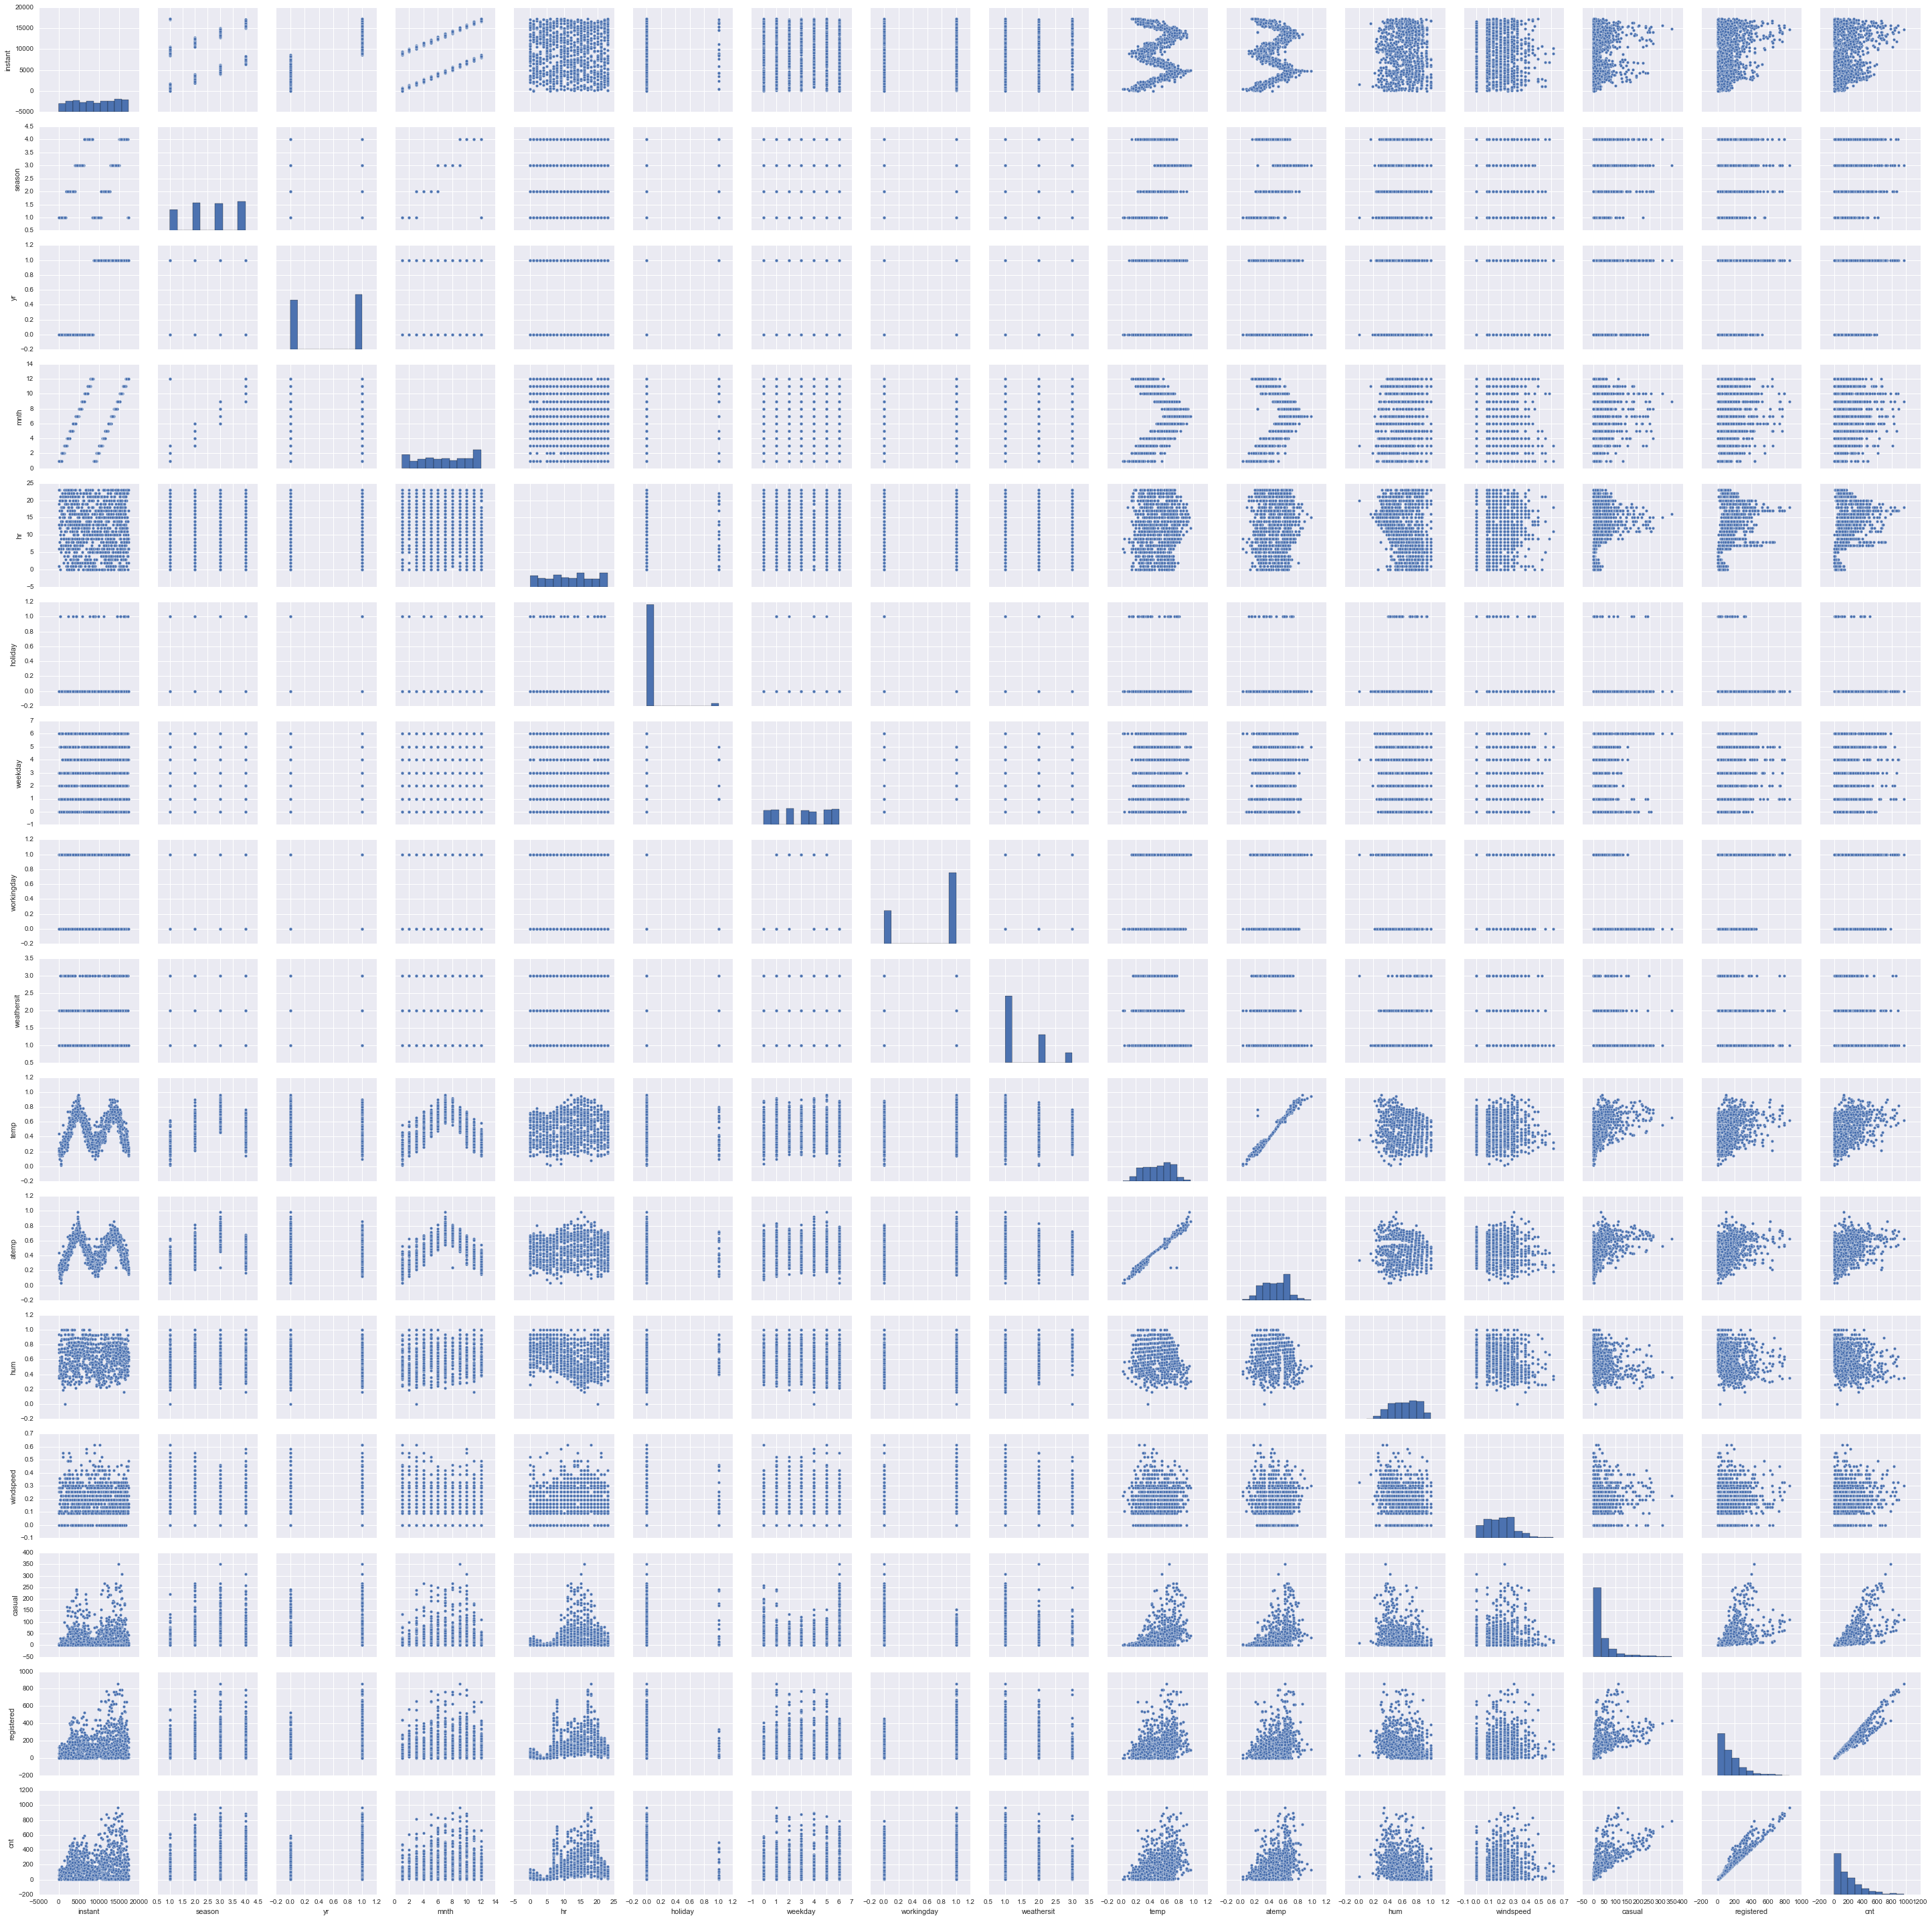

In [8]:
df.select_dtypes(include=[np.float])
sns.pairplot(df.sample(1000))

In [10]:
len(df.columns)

17

In [29]:
import sklearn

from sklearn import feature_selection

X = features
y = target

[f_scores, p_values] = feature_selection.f_regression(X, y)


non_encoded_features = pd.DataFrame({
        "columns": X.columns,
        "F Scores" : f_scores,
        "P Values": p_values
    })
print non_encoded_features
# print X.columns
# print f_scores
# print p_values
# Candidate predictors:
# atempt, hum, 

       F Scores      P Values     columns
0    254.771874  6.011151e-57      season
1    361.614212  8.099088e-80          yr
2     81.819045  1.645466e-19        mnth
3   1733.777141  0.000000e+00          hr
4     17.329320  3.158140e-05     holiday
5     18.625340  1.599713e-05     weekday
6   1730.496815  0.000000e+00  workingday
7    414.456811  4.525012e-91  weathersit
8   4653.965209  0.000000e+00        temp
9   4513.593048  0.000000e+00       atemp
10  2379.210774  0.000000e+00         hum
11   142.816317  8.667816e-33   windspeed


In [44]:
from sklearn import linear_model

# 1. Defined model
model = linear_model.LinearRegression()

# 2. Fit the model
model.fit(X, y)
model.fit(X["atemp"][:, np.newaxis], y)

# Betas
model.coef_

# Models
print model.score(X["atemp"][:, np.newaxis], y)

model.fit(X[["atemp","hum"]], y)
print model.score(X[["atemp", "hum"]], y)

model.fit(X[["atemp","hum","windspeed"]], y)
print model.score(X[["atemp", "hum","windspeed"]], y)

0.206188705733
0.311093509696
0.311698099897


In [66]:
weekday_dummies = pd.get_dummies(X["weekday"], prefix="weekday", drop_first=True)
weather_dummies = pd.get_dummies(X["weathersit"], prefix="weathersit", drop_first=True)
month_dummies = pd.get_dummies(X["mnth"], prefix="mnth", drop_first=True)
season_dummies = pd.get_dummies(X["season"], prefix="season", drop_first=True)
hour_dummies = pd.get_dummies(X["hr"], prefix="hr", drop_first=True)

X_dummy = pd.concat([
        X, 
        weekday_dummies,
        weather_dummies, 
        month_dummies,
        season_dummies,
        hour_dummies
    ], axis=1)

X_dummy = X_dummy.drop(["weekday"], axis=1)
X_dummy = X_dummy.drop(["weathersit"], axis=1)
X_dummy = X_dummy.drop(["mnth"], axis=1)
X_dummy = X_dummy.drop(["season"], axis=1)
X_dummy = X_dummy.drop(["hr"], axis=1)

model.fit(X_dummy, y)
print model.score(X_dummy, y)

print model.coef_

X_dummy.head()



0.589683231112
[  1.18382743e+01  -2.17074322e+12  -2.17074322e+12   7.31783095e+01
   1.95193592e+01  -2.87595329e+01  -1.67409322e+01   2.17074322e+12
   2.17074322e+12   2.17074322e+12   2.17074322e+12   2.17074322e+12
   5.64039612e+00  -3.61474609e+00  -1.11704102e+01  -3.71791840e+00
  -1.58398438e+00   7.93615723e+00   5.26489258e+00   5.62988281e+00
  -2.89904785e+00  -4.31115723e+00   4.66003418e-01   9.02456665e+00
   1.21280518e+01   5.15551758e+00   1.04125977e-01   9.70605469e+00
   1.92608643e+00   2.60156250e+00  -2.58853149e+00  -3.68203735e+00
  -5.70327759e+00  -6.10144043e+00  -4.38687134e+00  -1.09619141e+00
   5.09686279e+00   1.35603180e+01   1.99025421e+01   3.21495380e+01
   4.19489594e+01   4.83946533e+01   5.04110718e+01   5.24810181e+01
   5.14144897e+01   5.06893311e+01   5.26861572e+01   4.11671143e+01
   3.09768372e+01   2.04424896e+01   1.41921539e+01   9.69022369e+00
   4.11799622e+00]


,yr,holiday,workingday,temp,atemp,hum,windspeed,weekday_1,weekday_2,weekday_3,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0.22,0.2727,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0.22,0.2727,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0.24,0.2879,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0.24,0.2879,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
